### Data Modeling using Statistic Vectorization Model of the Data

In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nlp import preprocessing as pp

#### Load the vocabulary dictionaries for building word stats

In [38]:
vocab_dict = pp.get_cefr_word_dictionary()
adv_vocab_dict = pp.get_cefr_word_dictionary_adv()

#### Load the main data frame containing the readings and asscoiated levels



In [39]:
# One-stop
# data = pd.read_csv('data/one_stop.csv')

# CEFR
cefr_data = pd.read_csv('data/cefr_readings.csv')

#### Adding average word per document to dataframe

In [40]:
# One-Stop
# avg_word = pp.get_avg_word_length(data, 'documents')
# data['avg_word_len'] = avg_word

# CEFR
cefr_avg_word = pp.get_avg_word_length(cefr_data, 'documents')
cefr_data['avg_word_len'] = cefr_avg_word

#### Load Word levels Data Frame. Using previously loaded vocabulary dictionies

In [41]:
# One-Stop
# levels_df = pp.get_word_level_dataframe(data, 'documents', vocab_dict, adv_vocab_dict)

# CEFR
cefr_levels_df = pp.get_word_level_dataframe(cefr_data, 'documents', vocab_dict, adv_vocab_dict)

#### Chart

<Axes: title={'center': 'Word Level Distribution for the First Ten Documents'}>

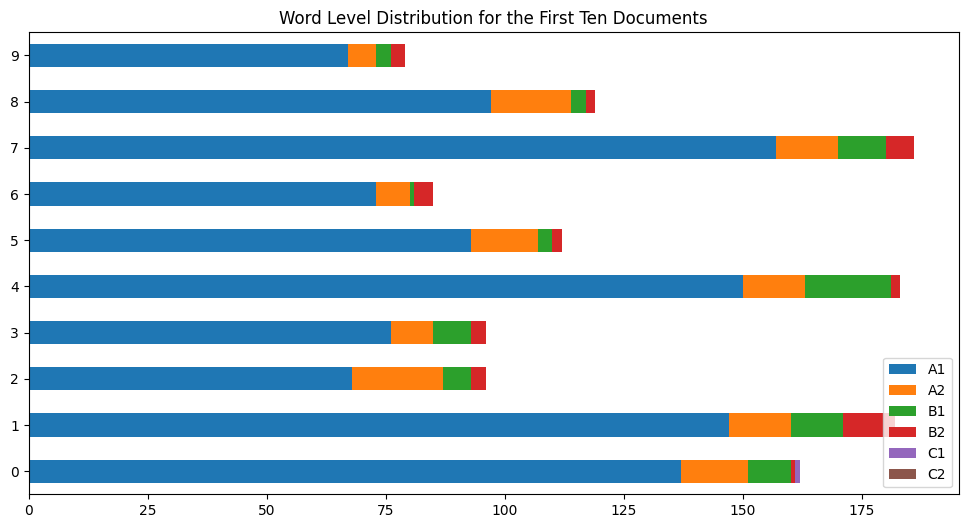

In [42]:
cefr_levels_df[:10].plot.barh(stacked=True, figsize=(12, 6), title='Word Level Distribution for the First Ten Documents')

#### Load Parts of Speech Dataframe. Drop entries with fewer than 2000 and 100 entries in the columns to avoid noise

In [43]:
# One-Stop
# pos_df = pp.get_part_of_speech_dataframe(data, 'documents')

# drop_pos = []
# for row in pd.DataFrame(pos_df.sum()).iterrows():
#     if row[1][0] < 2000:
#         drop_pos.append(row[0])
# drop_pos

# pos_df.drop(drop_pos, axis=1, inplace=True)

# CEFR
cefr_pos_df = pp.get_part_of_speech_dataframe(cefr_data, 'documents')

drop_pos = []
for row in pd.DataFrame(cefr_pos_df.sum()).iterrows():
    if row[1][0] < 100:
        drop_pos.append(row[0])
drop_pos

cefr_pos_df.drop(drop_pos, axis=1, inplace=True)

<Axes: title={'center': 'Word Level Distribution for the First Ten Documents'}>

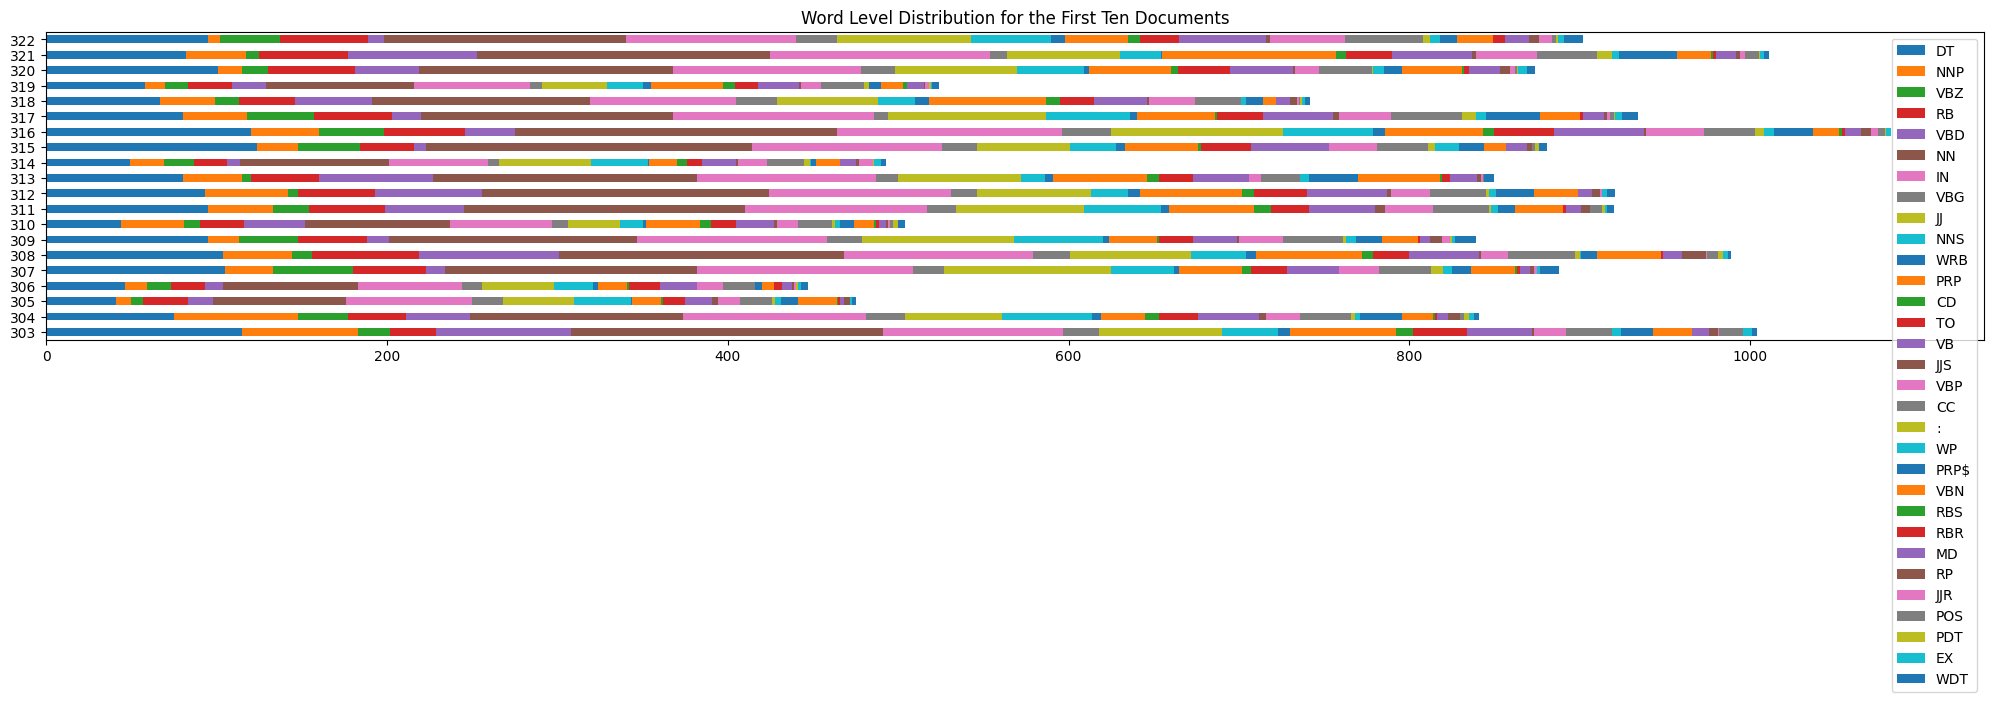

In [44]:
cefr_pos_df[-28:-8].plot.barh(stacked=True, figsize=(25, 4), title='Word Level Distribution for the First Ten Documents')

In [45]:
# # Exploration of parts-of-speech distributions
# total = sum(counts)
# for c in counts:
#     print(c, c/total)
# sum(pd.DataFrame(pos_df.sum()).values[:, 0].tolist())

#### Loading the Full Data Frame for analysis

In [46]:
# One-Stop
# df = pp.get_full_dataframe(data, 'documents', 'level', levels_df, pos_df)

# CEFR
cefr_df = pp.get_full_dataframe(cefr_data, 'documents', 'cefr_level', cefr_levels_df, cefr_pos_df)

c:\Users\ravis\Desktop\PersonifiedScriptWriter\phase-1-cerf\nlp\preprocessing.py:126: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_words = df_1.groupby('doc_id').sum()


In [47]:
cefr_df

,documents,cefr_level,avg_word_len,num_of_words,A1,A2,B1,B2,C1,C2,...,VBN,RBS,RBR,MD,RP,JJR,POS,PDT,EX,WDT
0,The Long Night This is David Reilly's first bo...,A2,4.21,187,137,14,9,1,1,0,...,1,1,1,1,0,0,0,0,0,0
1,Most house burglaries happen between 2 p.m. an...,A2,4.47,191,147,13,11,11,0,0,...,4,0,0,3,2,1,1,0,0,0
2,One very famous place for tourists in London i...,A2,4.59,112,68,19,6,3,0,0,...,5,0,0,2,0,0,0,0,0,0
3,To: All staff Subject: Holidays From: D Brown ...,A2,4.13,105,76,9,8,3,0,0,...,0,0,0,4,0,0,0,0,0,0
4,Canada Geese are large blue and white birds. W...,A2,4.30,194,150,13,18,2,0,0,...,2,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,"Some time ago, a website highlighted the risks...",C2,4.73,757,505,87,72,36,1,11,...,25,0,1,9,6,0,1,2,2,0
327,"A course at the Bamboo Bike Club, run by engin...",C2,4.84,865,521,86,65,76,3,5,...,16,1,3,5,5,2,2,3,0,4
328,The two sisters kept Lily's driving a secret f...,C2,4.49,928,602,93,91,51,4,8,...,27,1,0,13,4,1,3,1,2,7
329,I have never begun a novel with more misgiving...,C2,4.18,775,591,82,64,21,4,5,...,30,0,2,24,1,2,0,1,1,6


In [48]:
cefr_df.dtypes

documents        object
cefr_level       object
avg_word_len    float64
num_of_words      int64
A1                int64
A2                int64
B1                int64
B2                int64
C1                int64
C2                int64
DT                int64
NNP               int64
VBZ               int64
RB                int64
VBD               int64
NN                int64
IN                int64
VBG               int64
JJ                int64
NNS               int64
WRB               int64
PRP               int64
CD                int64
TO                int64
VB                int64
JJS               int64
VBP               int64
CC                int64
:                 int64
WP                int64
PRP$              int64
VBN               int64
RBS               int64
RBR               int64
MD                int64
RP                int64
JJR               int64
POS               int64
PDT               int64
EX                int64
WDT               int64
dtype: object

In [49]:
# features = ['num_of_words', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']
cefr_drop = ['documents','cefr_level']
# one_stop_drop = ['documents', 'doc_list', 'avg_num_words', 'total_num_sents', 'total_num_words', 'words_per_sents', 'level']

# documents = df.drop(one_stop_drop, axis=1)
cefr_documents = cefr_df.drop(cefr_drop, axis=1)

# target = df['level']
cefr_target = cefr_df['cefr_level']


##previous experiment with the One-Stop-English-Corpus
# three_levels = []
# for level in cefr_df['cefr_level']:
#     if level == 0:
#         three_levels.append('Ele')
    
#     elif ((level == 1) or (level == 2)):
#         three_levels.append('Int')
    
#     else:
#         three_levels.append('Adv')


# cefr_target = three_levels


# X_train = documents
# y_train = target

# X_test = cefr_documents
# y_test = cefr_target

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(documents, target, test_size=0.2, random_state=29)
X_train, X_test, y_train, y_test = train_test_split(cefr_documents, cefr_target, test_size=0.3, random_state=29,stratify=cefr_target,shuffle=True)

#### Book texts for Testing

In [50]:
# Amazon text
Amazon = "Tyler, trying to win back her attention, asked Lauren's opinion on a CD he held. She was distracted. I stared at the \
deep-voiced boy, taken aback, but he was looking away toward the dark forest behind us. He'd said that the Cullens didn't come here, \
but his tone had implied something more—that they weren't allowed; they were prohibited. His manner left a strange impression on me, \
and I tried toignore it without success."

In [51]:
# Great Gatsby text
gg = "He smiled understandingly-much more than understandingly. It was one of those rare smiles with a quality of eternal reassurance \
in it, that you may come across four or five times in life. It faced--or seemed to face--the whole eternal world for an instant, and \
then concentrated on you with an irresistible prejudice in your favor. It understood you just as far as you wanted to be understood, \
believed in you as you would like to believe in yourself, and assured you that it had precisely the impression of you that, at your \
best, you hoped to convey"

In [52]:
# Charlie and the Chocolate Factory text
cc = "Mr Willy Wonka can make marshmallows that taste of violets, and rich caramels that change colour every ten seconds as you suck \
them, and little feathery sweets that melt away deliciously the moment you put them between your lips. He can make chewing-gum that \
never loses its taste, and sugar balloons that you can blow up to enormous sizes before you pop them with a pin and gobble them up. \
And, by a most secret method, he can make lovely blue birds' eggs with black spots on them, and when you put one of these in your \
mouth, it gradually gets smaller and smaller until suddenly there is nothing left except a tiny little DARKRED sugary baby bird \
sitting on the tip of your tongue."

#### Model: Multinomial Naive Bayes

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,cross_val_score

# pipe_nb = make_pipeline(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
pipe_nb = make_pipeline(MultinomialNB())
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe_nb, X_train, y_train, cv=kfold)

pipe_nb.fit(X_train, y_train)
print("Training Acc.: ", pipe_nb.score(X_train, y_train))
print("Valid Acc.: ", pipe_nb.score(X_test, y_test))
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Training Acc.:  0.7229437229437229
Valid Acc.:  0.73
Cross-validation Scores: [0.70212766 0.63043478 0.65217391 0.73913043 0.67391304]
Mean CV Score: 0.6795559666975023


In [54]:
test_pred = pipe_nb.predict(X_test)

In [55]:
list_of_keys = cefr_pos_df.columns.tolist()
Amazon_sample = pp.process_sample(Amazon, list_of_keys, vocab_dict, adv_vocab_dict)
gatsby_sample = pp.process_sample(gg, list_of_keys, vocab_dict, adv_vocab_dict)
charlie_sample = pp.process_sample(cc, list_of_keys, vocab_dict, adv_vocab_dict)

In [56]:
print(f'Amazon predicted level: {pipe_nb.predict([Amazon_sample])}')
print(f'Gatsby predicted level: {pipe_nb.predict([gatsby_sample])}')
print(f'Charlie predicted level: {pipe_nb.predict([charlie_sample])}')

Amazon predicted level: ['B1']
Gatsby predicted level: ['B2']
Charlie predicted level: ['B1']


c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Confusion Matrix


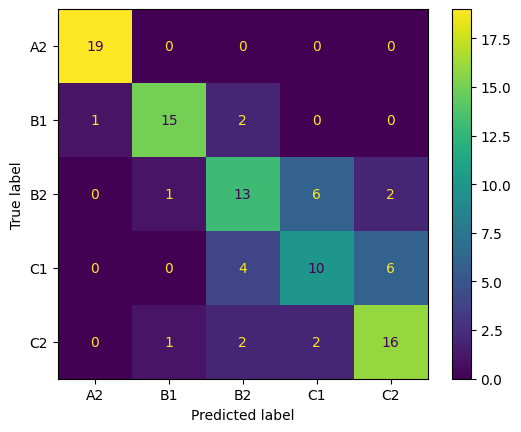

In [57]:
print('Confusion Matrix')
import sklearn


cm = sklearn.metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=pipe_nb.classes_)
disp.plot()

Confusion Matrix


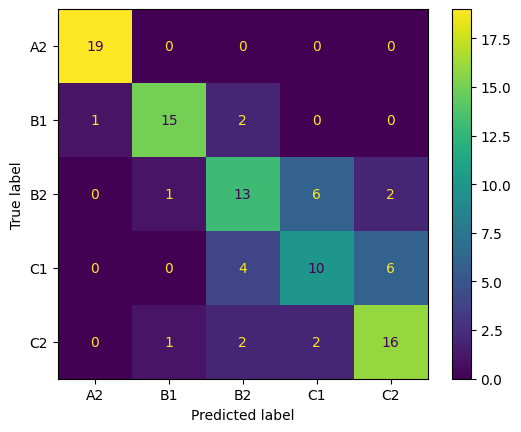

In [58]:
print('Confusion Matrix')
# plot_confusion_matrix(clf, X_test, y_test)


cm = sklearn.metrics.confusion_matrix(y_test, test_pred, labels=pipe_nb.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipe_nb.classes_)
disp.plot()
# plt.show()

#### Model: Gradient Boosting Classifer

In [59]:
pipe_gbc = make_pipeline(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))

pipe_gbc.fit(X_train, y_train)
kfold_gbc = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_gbc = cross_val_score(pipe_nb, X_train, y_train, cv=kfold_gbc)
print("Training Acc.: ", pipe_gbc.score(X_train, y_train))
print("Valid Acc.: ", pipe_gbc.score(X_test, y_test))
print("Cross-validation Scores:", cv_scores_gbc)
print("Mean CV Score:", cv_scores_gbc.mean())

Training Acc.:  1.0
Valid Acc.:  0.83
Cross-validation Scores: [0.70212766 0.63043478 0.65217391 0.73913043 0.67391304]
Mean CV Score: 0.6795559666975023


#### Model: Logistic Regression: One vs Rest

In [60]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression(max_iter=5000)).fit(X_train, y_train)
kfold_lror = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_lror = cross_val_score(clf, X_train, y_train, cv=kfold_lror)

print("Training Acc.: ", clf.score(X_train, y_train))
print("Valid Acc.: ", clf.score(X_test, y_test))
print("Cross-validation Scores:", cv_scores_lror)
print("Mean CV Score:", cv_scores_lror.mean())

Training Acc.:  0.948051948051948
Valid Acc.:  0.73
Cross-validation Scores: [0.74468085 0.5        0.67391304 0.65217391 0.69565217]
Mean CV Score: 0.6532839962997226


In [61]:
clf.predict(X_test)

array(['B1', 'B1', 'C2', 'B2', 'C1', 'B2', 'B1', 'B2', 'A2', 'A2', 'C1',
       'B1', 'C1', 'A2', 'A2', 'C1', 'C1', 'B2', 'A2', 'A2', 'C1', 'C1',
       'B2', 'C2', 'A2', 'C1', 'C1', 'B2', 'C1', 'C1', 'B1', 'C1', 'A2',
       'C2', 'C1', 'A2', 'C1', 'A2', 'A2', 'C2', 'B1', 'C1', 'B1', 'C2',
       'A2', 'C1', 'B1', 'C2', 'B1', 'B2', 'B2', 'C2', 'B2', 'B1', 'B1',
       'A2', 'A2', 'B2', 'B2', 'A2', 'C1', 'B1', 'C2', 'A2', 'C2', 'C1',
       'C2', 'B2', 'B2', 'A2', 'C2', 'C1', 'C1', 'B2', 'B2', 'A2', 'B2',
       'B1', 'B2', 'B2', 'C2', 'C2', 'C1', 'B2', 'B2', 'B1', 'C1', 'B1',
       'C2', 'C2', 'A2', 'C1', 'C2', 'B2', 'B2', 'A2', 'B1', 'C1', 'A2',
       'B2'], dtype='<U2')

In [62]:
print(f'Amazon predicted level: {clf.predict([Amazon_sample])}')
print(f'Gatsby predicted level: {clf.predict([gatsby_sample])}')
print(f'Charlie predicted level: {clf.predict([charlie_sample])}')

Amazon predicted level: ['A2']
Gatsby predicted level: ['B1']
Charlie predicted level: ['A2']


c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion Matrix


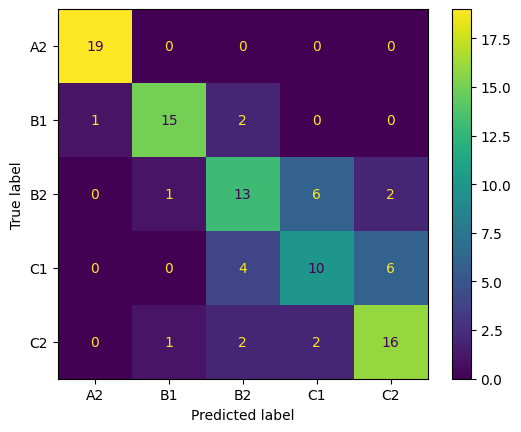

In [63]:
print('Confusion Matrix')
# plot_confusion_matrix(clf, X_test, y_test)


cm = sklearn.metrics.confusion_matrix(y_test, test_pred, labels=clf.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
# plt.show()

### conclusion: till now,using statistical modelling,without hyper-parameter-tuning, the best model is multinomial-naive-bayes..